<a href="https://colab.research.google.com/github/dtype2100/TIL/blob/master/naver_unlisted_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pdfminer.six

In [2]:
pip install konlpy

In [3]:
from pdfminer.high_level import extract_pages
from pdfminer.high_level import extract_text

from konlpy.tag import Twitter
from collections import Counter

import pprint
import pandas as pd

In [4]:
file_path = extract_text('/content/drive/MyDrive/NLP/Keyword_extraction/네이버 파이낸셜 비상장.pdf')

In [5]:
file_text = repr(file_path)

In [6]:
file_text

'\' \\n \\n\\x0c금융업 \\n\\n플랫폼  제국의  금융업  침공 \\n\\n최근  당국의  기류  변화에도  불구하고  플랫폼  기업들의  금융업  진출은  계속될  전망.  ‘언\\n\\n번들링+제휴’를  통한  간접  진출보다,  라이선스  취득을  통한  직접  진출이  늘어날  가능\\n\\n성  있음.  플랫폼들은  간편결제를  통해  지급결제  시장  점유율을  높이고,  잠재적인  금융 \\n\\n고객  수를  늘리는  중.  플랫폼/핀테크의  금융업  진출로  인해  SOHO 금융,  후불결제,  금\\n\\n융상품 중개 등이 블루오션으로 부상 \\n\\n최근의 기류 변화에도 플랫폼 기업들의 금융업 진출은 계속될 전망 \\n\\n플랫폼 기업들이 금융업에 진출하는 이유는 1) 늘어난 고객을 기반으로 이익을 창출\\n\\n해야할 단계에 도달했고, 2) 지급결제,  송금  비즈니스와  고객  층이 같은  금융업에  자\\n\\n신감을  가졌기 때문이다.  그리고  3)  금융업은  골목상권 논란에서  자유롭고, Lock-in\\n\\n효과에도 기여하며, 4) 언택트 금융회사의 성공적인 안착을 확인한 측면이 크다. \\n\\nAnalyst \\n구경회 \\nkh.koo@sks.co.kr \\n02-3773-9083 \\n\\n금융업 진출에 속도 조절이나 방법의 변경은 있어도 포기는 없다 \\n\\n향후  플랫폼  기업들도  금융업을  하고  싶으면  기존  금융기업들과  같은  규제,  같은  환\\n\\n경 하에서 영위해야 할 것으로 보인다. 그렇다면 플랫폼 기업들은 ‘언번들링+제휴’라\\n\\n는 간접 진출보다, 직접 진출을 선택해야 하는 상황일 수도 있다. \\n\\nAnalyst \\n최관순 \\nks1.choi@sks.co.kr \\n\\n02-3773-8812 \\n\\n플랫폼들은 간편결제를 통해 지급결제 시장 점유율을 높이는 중 \\n\\n국내  대형  플랫폼들은  간편결제  시장을  장악하고  있다.  2020 년  전자금융

In [7]:
file_text1 = file_text.replace('\\n', '')

In [8]:
file_text1

'\'  \\x0c금융업 플랫폼  제국의  금융업  침공 최근  당국의  기류  변화에도  불구하고  플랫폼  기업들의  금융업  진출은  계속될  전망.  ‘언번들링+제휴’를  통한  간접  진출보다,  라이선스  취득을  통한  직접  진출이  늘어날  가능성  있음.  플랫폼들은  간편결제를  통해  지급결제  시장  점유율을  높이고,  잠재적인  금융 고객  수를  늘리는  중.  플랫폼/핀테크의  금융업  진출로  인해  SOHO 금융,  후불결제,  금융상품 중개 등이 블루오션으로 부상 최근의 기류 변화에도 플랫폼 기업들의 금융업 진출은 계속될 전망 플랫폼 기업들이 금융업에 진출하는 이유는 1) 늘어난 고객을 기반으로 이익을 창출해야할 단계에 도달했고, 2) 지급결제,  송금  비즈니스와  고객  층이 같은  금융업에  자신감을  가졌기 때문이다.  그리고  3)  금융업은  골목상권 논란에서  자유롭고, Lock-in효과에도 기여하며, 4) 언택트 금융회사의 성공적인 안착을 확인한 측면이 크다. Analyst 구경회 kh.koo@sks.co.kr 02-3773-9083 금융업 진출에 속도 조절이나 방법의 변경은 있어도 포기는 없다 향후  플랫폼  기업들도  금융업을  하고  싶으면  기존  금융기업들과  같은  규제,  같은  환경 하에서 영위해야 할 것으로 보인다. 그렇다면 플랫폼 기업들은 ‘언번들링+제휴’라는 간접 진출보다, 직접 진출을 선택해야 하는 상황일 수도 있다. Analyst 최관순 ks1.choi@sks.co.kr 02-3773-8812 플랫폼들은 간편결제를 통해 지급결제 시장 점유율을 높이는 중 국내  대형  플랫폼들은  간편결제  시장을  장악하고  있다.  2020 년  전자금융업자의  간편결제  금액  75.1 조원  중에서  네이버페이,  카카오페이,  쿠팡페이  등  Big3 의  시장점유율은 65%로 전년대비 9%p 확대되었다. 지급결제 시장의 경쟁력 강화는 잠재적인 금융 고객의 확보라는 차원에서 매우 중요하다. 세계적

In [9]:
nlpy = Twitter()

nouns = nlpy.nouns(file_text1)

print(nouns)

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['금융업', '플랫폼', '제국', '금융업', '침공', '최근', '당국', '기류', '변화', '불구', '플랫폼', '기업', '금융업', '진출', '계속', '전망', '번', '링', '제휴', '를', '통한', '간접', '진출', '라이선스', '취득', '통한', '직접', '진출', '가능성', '플랫폼', '간편', '결제', '통해', '지급', '결제', '시장', '점유', '율', '높이', '잠재', '금융', '고객', '수', '중', '플랫폼', '핀', '테크', '금융업', '진출', '금융', '후불', '결제', '금융', '상품', '중개', '등', '블루', '오션', '부상', '최근', '기류', '변화', '플랫폼', '기업', '금융업', '진출', '계속', '전망', '플랫폼', '기업', '금융업', '진출', '이유', '고객', '기반', '이익', '창', '단계', '도달', '지급', '결제', '송금', '비즈니스', '고객', '층', '금융업', '자신감', '때문', '금융업', '골목', '상권', '논란', '자유', '효과', '기여', '언택트', '금융', '회사', '성공', '안착', '확인', '측면', '구경', '회', '금융업', '진출', '속도', '조절', '방법', '변경', '포기', '향후', '플랫폼', '기업', '금융업', '기존', '금융', '기업', '규제', '환경', '하', '영위', '것', '플랫폼', '기업', '번', '링', '제휴', '간접', '진출', '직접', '진출', '선택', '상황', '일', '수도', '최', '관순', '플랫폼', '간편', '결제', '통해', '지급', '결제', '시장', '점유', '율', '중', '국내', '대형', '플랫폼', '간편', '결제', '시장', '장악', '년', '전자금융업', '간편', '결제', '금액', '조원', '중', '네이버', '페이', '카카오'

In [10]:
count = Counter(nouns)

tag_count = []
tags = []

for n, c in count.most_common(100):
    dics = {'tag': n, 'count': c}
    if len(dics['tag']) >= 2 and len(tags) <= 49:
        tag_count.append(dics)
        tags.append(dics['tag'])

In [11]:
for tag in tag_count:
    print(" {:<14}".format(tag['tag']), end='\t')
    print("{}".format(tag['count']))

 금융            	405
 카카오           	329
 결제            	292
 플랫폼           	225
 기업            	210
 페이            	195
 증권            	166
 서비스           	157
 대출            	153
 뱅크            	145
 자료            	143
 은행            	136
 회사            	135
 고객            	131
 토스            	127
 금융업           	117
 성장            	113
 시장            	108
 네이버           	104
 지급            	103
 테크            	92
 진출            	91
 상품            	89
 보험            	84
 간편            	77
 기존            	76
 미국            	76
 영업            	75
 기준            	75
 온라인           	74
 수익            	73
 사업            	72
 제휴            	70
 통해            	68
 거래            	68
 영위            	66
 이익            	64
 후불            	63
 국내            	63
 비즈니스          	62
 조원            	59
 송금            	58
 중개            	54
 관련            	54
 투자            	54
 데이터           	53
 증가            	53
 판매            	53
 설립            	49
 매출            	49


In [12]:
# for tag in tag_count:
#     print(" {:<14}, {}".format(tag['tag'], tag['count']), end='\t')

In [13]:
# def tag_counting(file):
#     file_path = extract_text('/content/drive/MyDrive/NLP/Keyword_extraction/네이버 파이낸셜 비상장.pdf')
#     file_text = repr(file_path)
#     file_text = file_text.replace('\\n', '')

#     nlpy = Twitter()
#     nouns = nlpy.nouns(file_text)

#     count = Counter(nouns) 
    
#     tag_count = []
#     tags = []
    
#     for n, c in count.most_common(100):
#       dics = {'tag': n, 'count': c}
#       if len(dics['tag']) >= 2 and len(tags) <= 49:
#         tag_count.append(dics)
#         tags.append(dics['tag'])

#     for tag in tag_count:
#       print(" {:<14}".format(tag['tag']), end='\t')
      
#       print("{}".format(tag['count']))
      
#       print("\n---------------------------------")

#       print("     명사 총  {}개".format(len(tags)))

#       print("---------------------------------\n\n")
        
#       return tags

# tags = tag_counting(file = "report.txt")
# print(tags)

In [14]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances

import pandas as pd
import numpy as np

from numpy import dot
from numpy.linalg import norm

In [16]:
n_topics = 4

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(tags)
svd = TruncatedSVD(n_components=n_topics, n_iter=100)

U = svd.fit_transform(tfidf)
Vt = svd.components_

In [17]:
len(tags)

50

In [18]:
U.shape

(50, 4)

In [19]:
Vt.shape

(4, 50)

In [20]:
tfidf.shape

(50, 50)

In [21]:
vocab =  tfidf_vect.get_feature_names_out()
print(len(vocab))

50


In [22]:
Vt

array([[ 0.1611387 , -0.0631666 , -0.00956065, -0.01556833, -0.26291304,
        -0.06270805, -0.07292794,  0.11156095,  0.17081007,  0.06711015,
        -0.35712024,  0.15704865,  0.00535595, -0.17134461,  0.01753194,
        -0.11363179,  0.0792177 , -0.01630347,  0.05913529,  0.24910475,
         0.06808873,  0.04530093, -0.14995282,  0.10443631,  0.02337486,
        -0.018332  , -0.20496953,  0.11325148, -0.19944341,  0.04975492,
         0.3626795 ,  0.08594263,  0.30407668, -0.02304899, -0.07968498,
         0.07121276,  0.00873518, -0.04237096, -0.02599684, -0.10621782,
        -0.10570295, -0.14207246, -0.04627543,  0.17602673,  0.00122079,
        -0.10633303, -0.27451488,  0.01586644, -0.17793672,  0.00514505],
       [ 0.16981767,  0.1287782 , -0.00336388,  0.17142827,  0.15976898,
         0.15801116, -0.13930632, -0.0678914 ,  0.18707562,  0.20169327,
        -0.03493381,  0.1236334 , -0.18560355,  0.05427991, -0.03823032,
         0.00853027,  0.07337576,  0.08384592,  0.

In [23]:
n = 4
for i, topic in enumerate(Vt):
    print("Topic {} :".format(i), [ (vocab[i], topic[i].round(3)) for i in topic.argsort()[:-n-1:-1]])

Topic 0 : [('은행', 0.363), ('자료', 0.304), ('사업', 0.249), ('통해', 0.176)]
Topic 1 : [('상품', 0.431), ('서비스', 0.212), ('기존', 0.202), ('비즈니스', 0.192)]
Topic 2 : [('미국', 0.365), ('회사', 0.3), ('뱅크', 0.262), ('결제', 0.238)]
Topic 3 : [('대출', 0.348), ('은행', 0.28), ('토스', 0.272), ('페이', 0.229)]


In [24]:
n = 3
temp = [0, 1, 2, 3, 4, 5]
temp[:-n:-1]

[5, 4]

In [25]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cosine_similarity(a, b):
    return dot(a, b) / (norm(a) * norm(b))

def calc_similarity_matrix(vectors):
    
    n_word = len(vectors)
    similarity_matrix = np.zeros((n_word, n_word))
    
    for i in range(n_word):
        for j in range(n_word):
            similarity_matrix[i, j] = cosine_similarity(vectors[i], vectors[j]).round(3)
            
    return similarity_matrix

In [26]:
vectors = Vt.T
word_similarity_matrix = calc_similarity_matrix(vectors)
word_similarity_matrix.shape

(50, 50)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# font = '/content/drive/MyDrive/NLP/Keyword_extraction/DejaVuSans.ttf'

plt.rc("font", family="NanumBarunGothic") #windows
#plt.rc("font", family="AppleGothic") #mac

def visualize_similarity(similarity_matrix, label):
    # font_path = font
    mask = np.triu(np.ones_like(similarity_matrix, dtype=np.bool))
    plt.rcParams['figure.figsize'] = [22, 20]
    ax = sns.heatmap(similarity_matrix, mask=mask, xticklabels=label, yticklabels=label, 
                     annot=True, fmt=".2f", annot_kws={"size":8}, cmap="coolwarm") 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


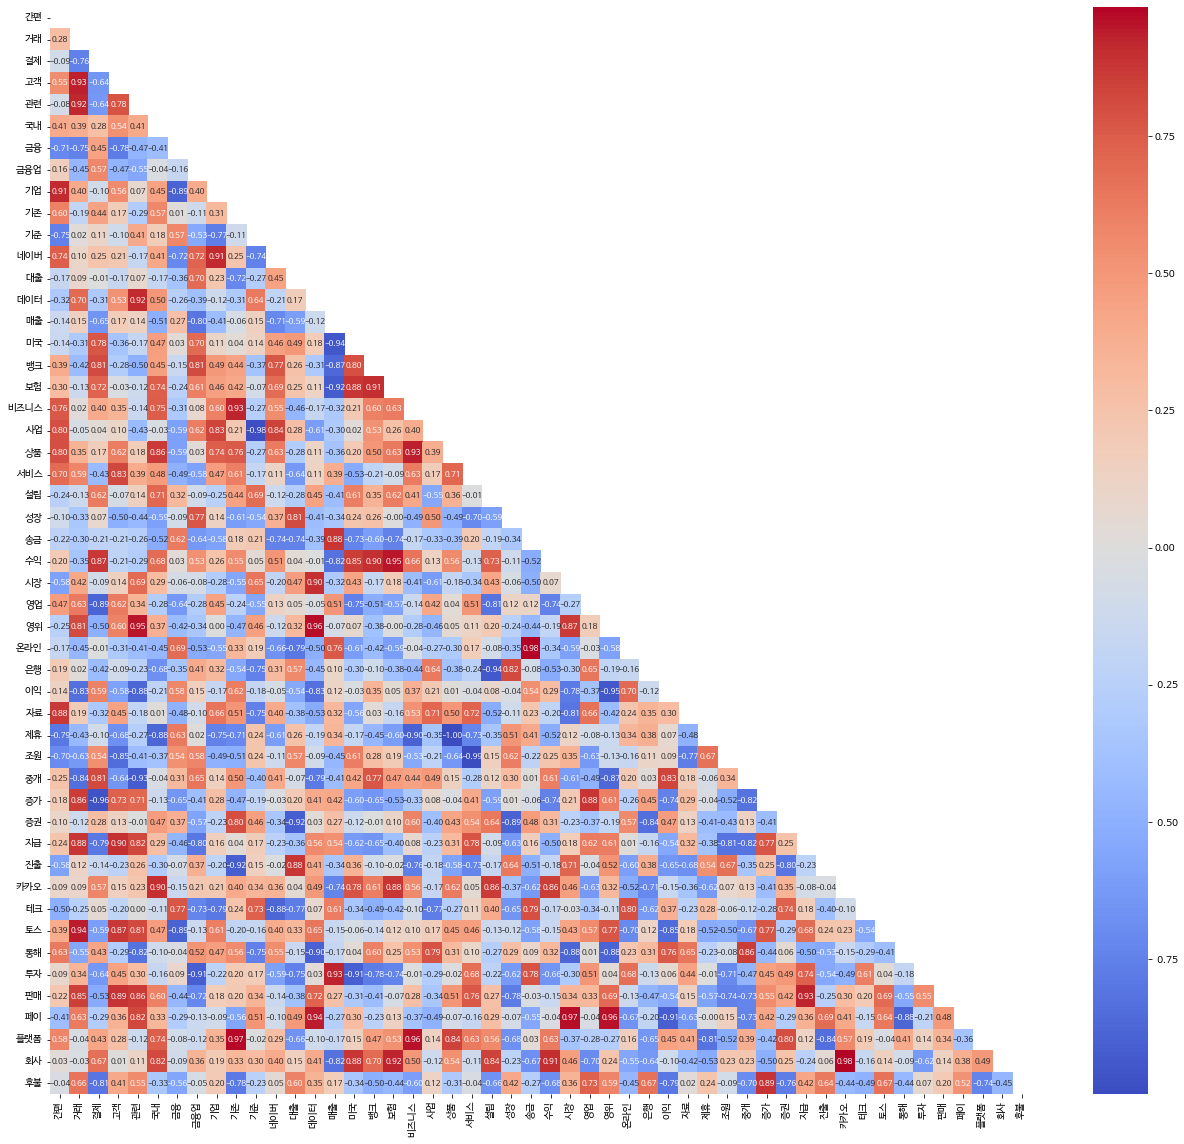

In [28]:
visualize_similarity(word_similarity_matrix, vocab)